# N uptake analysis for RhizCG 2013

## Set Variables

In [1]:
workDir = '/home/bryan/RhizCG/figures/'
fullData = '/home/bryan/RhizCG/data/MiSeq_amplicon/PlotData.txt'

#Init

In [2]:
%load_ext rpy2.ipython

In [13]:
%%R
library(lme4)
#library(lmerTest)
library(ggplot2)
library(dplyr)
library(pbkrtest)
library(gridExtra)
#library(multcomp)

/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 
Attaching package: ‘dplyr’


  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 
Attaching package: ‘gridExtra’


  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The following object is masked from ‘package:dplyr’:

    combine


  warnings.warn(x, RRuntimeWarning)


### Read plant master table 

In [14]:
%%R -i fullData -i workDir
setwd(workDir)
Master = read.table(fullData, header = TRUE)
Master$Rep = as.factor(Master$Rep)
colnames(Master)

 [1] "Unique"             "PlotID"             "Plant"             
 [4] "Plot"               "Treatment"          "Rep"               
 [7] "DAP"                "Sampling"           "PlantSample"       
[10] "Type"               "Grass_Broad"        "Status"            
[13] "Subfamily"          "Symbol_class"       "Plant_num"         
[16] "Leaf_AreaBiomass_g" "Biomass_T"          "Biomass_P"         
[19] "Leaf_Area_cm2"      "SLA"                "Leaf_N"            
[22] "Leaf_C"             "LeafC_N"            "LNa"               
[25] "Plant_N"            "Plant_C"            "Plant_CN"          
[28] "d15N"               "tN_p"               "BX_act"            
[31] "CB_act"             "LAP_act"            "NAG_act"           
[34] "soil_dw"            "BX_activity_g"      "CB_activity_g"     
[37] "LAP_activity_g"     "NAG_activity_g"     "BX_barefactor"     
[40] "CB_barefactor"      "LAP_barefactor"     "NAG_barefactor"    
[43] "BX_dif"             "CB_dif"             "

# Loop through dates to test for N uptake differences on a sampling date

In [15]:
%%R
Master %>% group_by(Plant, Treatment) %>%
        summarise(N = mean(tN_p),
                 st_dev = sd(tN_p),
                 B= mean(A_Resid_logB),
                 B.se = sd(A_Resid_logB)) %>% print(n=60)

Source: local data frame [46 x 6]
Groups: Plant [?]

    Plant Treatment         N     st_dev           B      B.se
   <fctr>    <fctr>     <dbl>      <dbl>       <dbl>     <dbl>
1  75-062      Nneg 1.2180833 0.31876256 -0.21905200 0.1408799
2  75-062      Npos 1.1363772 0.31101464 -0.31522690 0.3058215
3   ABUTH      Nneg 1.2447473 0.15213099  0.08260322 0.1029025
4   ABUTH      Npos 1.3027344 0.69225888  0.06161444 0.4344922
5   AMAPO      Nneg 1.2339784 0.35356767  0.39436089 0.3689110
6   AMAPO      Npos 2.1634450 0.45455468  0.74980416 0.2048923
7     B73      Nneg 1.4658371 0.43831277 -0.09544085 0.1331802
8     B73      Npos 2.1854472 0.36386498 -0.09514569 0.1961680
9     B97      Nneg 1.2427987 0.37921594 -0.44661295 0.1181844
10    B97      Npos 1.7268705 0.57992872 -0.35909658 0.2242555
11   BARE      Nneg        NA         NA          NA        NA
12   BARE      Npos        NA         NA          NA        NA
13  ECHCG      Nneg 0.7626846 0.30846186  0.05961872 0.3524087
14

# Biomass comparisons in a sampling day

In [16]:
%%R
DATE = c("53", "57", "84")
data = filter(Master, Type != "Maize" & Treatment == "Nneg"| Plant == "B73" & Treatment == "Nneg")

for(d in DATE){ 
    d %>% print
    Sub = filter(data, DAP == d)

   m = lmer(Biomass_P ~ Plant + (1|Rep) , 
           data = Sub, na.rm = TRUE)
          #summary(m1) %>% print
          anova(m, ddf="Kenward-Roger", type=3) %>% print
   
}

[1] "53"
Analysis of Variance Table
      Df Sum Sq Mean Sq F value
Plant  1 317.71  317.71  1.6543
[1] "57"
Analysis of Variance Table
      Df Sum Sq Mean Sq F value
Plant  1 782.58  782.58  24.947
[1] "84"
Analysis of Variance Table
      Df Sum Sq Mean Sq F value
Plant  2  21649   10825  3.3005


In [17]:
%%R
DATE = c("53", "57", "84")
data = filter(Master, Type != "Maize" & Treatment == "Npos"| Plant == "B73" & Treatment == "Npos")

for(d in DATE){ 
    d %>% print
    Sub = filter(data, DAP == d)

   m = lmer(Biomass_P ~ Plant + (1|Rep) , 
           data = Sub, na.rm = TRUE)
          #summary(m1) %>% print
          anova(m, ddf="Kenward-Roger", type=3) %>% print
   
}

[1] "53"
Analysis of Variance Table
      Df Sum Sq Mean Sq F value
Plant  1   47.8    47.8  0.3562
[1] "57"
Analysis of Variance Table
      Df Sum Sq Mean Sq F value
Plant  1 842.18  842.18   4.597
[1] "84"
Analysis of Variance Table
      Df Sum Sq Mean Sq F value
Plant  2  73199   36600  9.3478


## N uptake comparisons

In [18]:
%%R
DATE = c("53", "57", "84")
data = filter(Master, Type != "Maize" & Treatment == "Nneg"| Plant == "B73" & Treatment == "Nneg")

for(d in DATE){ 
    d %>% print
    Sub = filter(data, DAP == d)

   m = lmer(tN_p ~ Plant + (1|Rep) , 
           data = Sub, na.rm = TRUE)
          #summary(m1) %>% print
          anova(m, ddf="Kenward-Roger", type=3) %>% print
   
}
     

[1] "53"
Analysis of Variance Table
      Df  Sum Sq Mean Sq F value
Plant  1 0.44424 0.44424  4.0356
[1] "57"
Analysis of Variance Table
      Df  Sum Sq Mean Sq F value
Plant  1 0.56394 0.56394  22.724
[1] "84"
Analysis of Variance Table
      Df Sum Sq Mean Sq F value
Plant  2 1.0514 0.52571  0.8293


In [19]:
%%R
DATE = c("53", "57", "84")
data = filter(Master, Type != "Maize" & Treatment == "Npos"| Plant == "B73" & Treatment == "Npos")

for(d in DATE){ 
    d %>% print
    Sub = filter(data, DAP == d)

   m = lmer(tN_p ~ Plant + (1|Rep) , 
           data = Sub, na.rm = TRUE)
          #summary(m1) %>% print
          anova(m, ddf="Kenward-Roger", type=3) %>% print
   
}

[1] "53"
Analysis of Variance Table
      Df Sum Sq Mean Sq F value
Plant  1 1.3068  1.3068  7.4121
[1] "57"
Analysis of Variance Table
      Df  Sum Sq Mean Sq F value
Plant  1 0.30664 0.30664  1.8992
[1] "84"
Analysis of Variance Table
      Df Sum Sq Mean Sq F value
Plant  2 9.2361   4.618  2.1392


# Analysis of maize within a sampling date

In [20]:
%%R
#Biomass
print("Nneg")
DATE = c("72", "79", "88")
data = filter(Master, Type == "Maize" & Treatment == "Nneg")

for(d in DATE){ 
    d %>% print
    Sub = filter(data, DAP == d)

   m = lmer(Biomass_P ~ Plant + (1|Rep) , 
           data = Sub, na.rm = TRUE)
          #summary(m1) %>% print
          anova(m, ddf="Kenward-Roger", type=3) %>% print
   
}

print("Npos")
DATE = c("72", "79", "88")
data = filter(Master, Type == "Maize" & Treatment == "Npos")

for(d in DATE){ 
    d %>% print
    Sub = filter(data, DAP == d)

   m = lmer(Biomass_P ~ Plant + (1|Rep) , 
           data = Sub, na.rm = TRUE)
          #summary(m1) %>% print
          anova(m, ddf="Kenward-Roger", type=3) %>% print
   
}

[1] "Nneg"
[1] "72"
Analysis of Variance Table
      Df Sum Sq Mean Sq F value
Plant  3 4496.5  1498.8  5.7042
[1] "79"
Analysis of Variance Table
      Df Sum Sq Mean Sq F value
Plant  3 6416.1  2138.7  4.0191
[1] "88"
Analysis of Variance Table
      Df Sum Sq Mean Sq F value
Plant  2 3417.7  1708.8  5.5156
[1] "Npos"
[1] "72"
Analysis of Variance Table
      Df Sum Sq Mean Sq F value
Plant  3 1615.6  538.55  2.0207
[1] "79"
Analysis of Variance Table
      Df Sum Sq Mean Sq F value
Plant  3 5011.2  1670.4   3.209
[1] "88"
Analysis of Variance Table
      Df Sum Sq Mean Sq F value
Plant  2 1370.9  685.44  1.8662


In [21]:
%%R
#N uptake
print("Nneg")
DATE = c("72", "79", "88")
data = filter(Master, Type == "Maize" & Treatment == "Nneg")

for(d in DATE){ 
    d %>% print
    Sub = filter(data, DAP == d)

   m = lmer(tN_p ~ Plant + (1|Rep) , 
           data = Sub, na.rm = TRUE)
          #summary(m1) %>% print
          anova(m, ddf="Kenward-Roger", type=3) %>% print
   
}

print("Npos")
DATE = c("72", "79", "88")
data = filter(Master, Type == "Maize" & Treatment == "Npos")

for(d in DATE){ 
    d %>% print
    Sub = filter(data, DAP == d)

   m = lmer(tN_p ~ Plant + (1|Rep) , 
           data = Sub, na.rm = TRUE)
          #summary(m1) %>% print
          anova(m, ddf="Kenward-Roger", type=3) %>% print
   
}

[1] "Nneg"
[1] "72"
Analysis of Variance Table
      Df  Sum Sq Mean Sq F value
Plant  3 0.46632 0.15544  1.0569
[1] "79"
Analysis of Variance Table
      Df  Sum Sq  Mean Sq F value
Plant  3 0.20486 0.068287  0.3532
[1] "88"
Analysis of Variance Table
      Df  Sum Sq Mean Sq F value
Plant  2 0.72129 0.36065  2.8418
[1] "Npos"
[1] "72"
Analysis of Variance Table
      Df  Sum Sq  Mean Sq F value
Plant  3 0.12697 0.042324  0.4266
[1] "79"
Analysis of Variance Table
      Df Sum Sq Mean Sq F value
Plant  3 1.1615 0.38717  2.3862
[1] "88"
Analysis of Variance Table
      Df Sum Sq Mean Sq F value
Plant  2 1.5897 0.79485  3.9918


# Analysis of growth residuals

## Annuals - biomass

In [25]:
%%R
data = filter(Master, Type != "Maize"  | Plant == "B73" )
 data %>% select(Plant, Treatment, A_Resid_logB)

     Plant Treatment A_Resid_logB
1     BARE      Nneg           NA
2     BARE      Npos           NA
3    FAGES      Nneg  0.345822635
4    FAGES      Npos -0.149317702
5     BARE      Nneg           NA
6     BARE      Npos           NA
7    FAGES      Nneg  0.132136408
8    FAGES      Npos  0.061297364
9     BARE      Nneg           NA
10    BARE      Npos           NA
11   FAGES      Nneg  0.370736728
12   FAGES      Npos  0.928976742
13   FAGES      Nneg  0.342790798
14   FAGES      Npos  0.622087610
15    BARE      Nneg           NA
16    BARE      Npos           NA
17    BARE      Nneg           NA
18    BARE      Npos           NA
19   AMAPO      Nneg  0.580496943
20   AMAPO      Npos  0.877816096
21   ECHCG      Nneg -0.341870715
22   ECHCG      Npos  0.600360913
23    BARE      Nneg           NA
24    BARE      Npos           NA
25   AMAPO      Nneg  0.808584305
26   AMAPO      Npos  0.857444746
27   ECHCG      Nneg  0.075184886
28   ECHCG      Npos  0.381298405
29   AMAPO    

In [28]:
%%R
#Full model
data = filter(Master, Type != "Maize"  | Plant == "B73" ) %>%
        filter(!is.na(A_Resid_logB))
dim(data) %>% print
m = lmer(A_Resid_logB ~ Plant + Treatment + Plant:Treatment + (1|Rep) + (1|Rep:Plant), 
          data = data, na.rm = TRUE)
         summary(m) %>% print
        anova(m) 
        #anova(m, ddf="Kenward-Roger", type=3) %>% print

[1] 96 64
Linear mixed model fit by REML ['lmerMod']
Formula: A_Resid_logB ~ Plant + Treatment + Plant:Treatment + (1 | Rep) +  
    (1 | Rep:Plant)
   Data: data

REML criterion at convergence: 54.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.7309 -0.4500 -0.0938  0.5401  1.8944 

Random effects:
 Groups    Name        Variance Std.Dev.
 Rep:Plant (Intercept) 0.03225  0.1796  
 Rep       (Intercept) 0.00000  0.0000  
 Residual              0.05309  0.2304  
Number of obs: 96, groups:  Rep:Plant, 48; Rep, 4

Fixed effects:
                           Estimate Std. Error t value
(Intercept)                0.082603   0.146065   0.566
PlantAMAPO                 0.311758   0.206567   1.509
PlantB73                  -0.178044   0.206567  -0.862
PlantECHCG                -0.022985   0.206567  -0.111
PlantELCOR                -0.450974   0.206567  -2.183
PlantERATE                -0.855816   0.206567  -4.143
PlantFAGES                 0.215268   0.206567   1.042
PlantGLYMA 

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
      Sum Sq Mean Sq NumDF DenDF F.value    Pr(>F)    
Plant 6.0235 0.54759    11    33   7.271 4.072e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


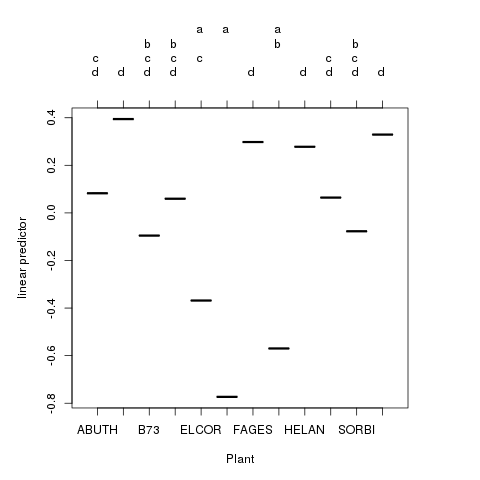

In [30]:
%%R
#just Nneg
data = filter(Master, Type != "Maize" & Treatment == "Nneg" | Plant == "B73" & Treatment == "Nneg")
m = lmer(A_Resid_logB ~ Plant + (1|Rep), 
          data = data, na.rm = TRUE)
         #summary(m) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

m1.lsm = lsmeans(m)
m1.glht = glht(m, linfct = mcp(Plant = "Tukey"))
#summary(m1.glht)
m1.cld = cld(m1.glht, level = 0.05)
old.par <- par(mai=c(1,1,1.5,1), no.readonly = TRUE)
plot(m1.cld)

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
      Sum Sq Mean Sq NumDF DenDF F.value    Pr(>F)    
Plant 9.3992 0.85448    11    33  8.9598 4.175e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


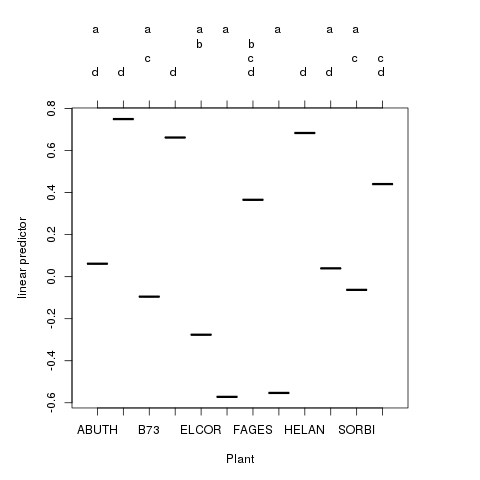

In [31]:
%%R
#just Npos
data = filter(Master, Type != "Maize" & Treatment == "Npos" | Plant == "B73" & Treatment == "Npos")
m = lmer(A_Resid_logB ~ Plant + (1|Rep), 
          data = data, na.rm = TRUE)
         #summary(m) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

m1.lsm = lsmeans(m)
m1.glht = glht(m, linfct = mcp(Plant = "Tukey"))
#summary(m1.glht)
m1.cld = cld(m1.glht, level = 0.05)
old.par <- par(mai=c(1,1,1.5,1), no.readonly = TRUE)
plot(m1.cld)

## Annuals - N uptake

In [32]:
%%R
#Full model
data = filter(Master, Type != "Maize"  | Plant == "B73" )
m = lmer(A_Resid_logN ~ Plant + Treatment + Plant:Treatment + (1|Rep) + (1|Rep:Plant), 
          data = data, na.rm = TRUE)
         #summary(m) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                Sum Sq Mean Sq NumDF DenDF F.value    Pr(>F)    
Plant           3.9998 0.36362    11    33   5.286 9.202e-05 ***
Treatment       2.3380 2.33804     1    36  33.986 1.173e-06 ***
Plant:Treatment 1.1933 0.10848    11    36   1.577    0.1479    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
      Sum Sq Mean Sq NumDF DenDF F.value    Pr(>F)    
Plant  5.037 0.45791    11    33  4.2826 0.0005565 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


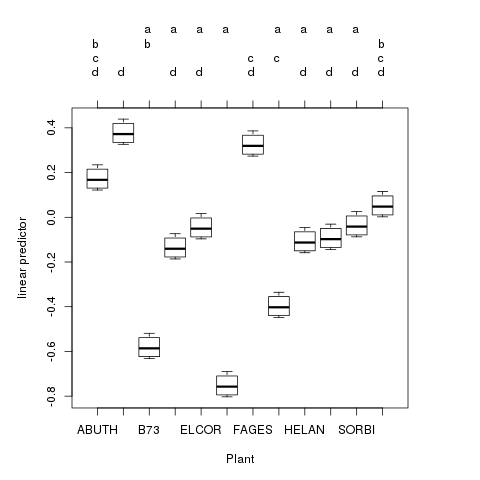

In [34]:
%%R
#just Nneg
data = filter(Master, Type != "Maize" & Treatment == "Nneg" | Plant == "B73" & Treatment == "Nneg")
m = lmer(A_Resid_logN ~ Plant + (1|Rep), 
          data = data, na.rm = TRUE)
         #summary(m) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

m1.lsm = lsmeans(m)
m1.glht = glht(m, linfct = mcp(Plant = "Tukey"))
#summary(m1.glht)
m1.cld = cld(m1.glht, level = 0.05)
old.par <- par(mai=c(1,1,1.5,1), no.readonly = TRUE)
plot(m1.cld)
        

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
      Sum Sq Mean Sq NumDF DenDF F.value    Pr(>F)    
Plant 6.6824 0.60749    11    33  4.4511 0.0004065 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


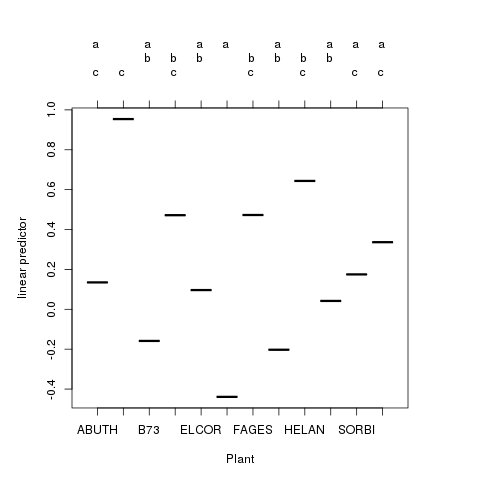

In [36]:
%%R
#just Npos
data = filter(Master, Type != "Maize" & Treatment == "Npos" | Plant == "B73" & Treatment == "Npos")
m = lmer(A_Resid_logN ~ Plant + (1|Rep), 
          data = data, na.rm = TRUE)
         #summary(m) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

m1.lsm = lsmeans(m)
m1.glht = glht(m, linfct = mcp(Plant = "Tukey"))
#summary(m1.glht)
m1.cld = cld(m1.glht, level = 0.05)
old.par <- par(mai=c(1,1,1.5,1), no.readonly = TRUE)
plot(m1.cld)



## Annuals C:N residuals

In [66]:
%%R
#Full model
data = filter(Master, Type != "Maize"  | Plant == "B73" )
m = lmer(A_Resid_logCN ~ Plant + Treatment + Plant:Treatment + (1|Rep) + (1|Rep:Plant), 
          data = data, na.rm = TRUE)
         #summary(m) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                 Sum Sq Mean Sq NumDF DenDF F.value    Pr(>F)    
Plant           2.62933 0.23903    11    33  16.724 1.818e-10 ***
Treatment       0.64245 0.64245     1    36  44.950 8.041e-08 ***
Plant:Treatment 0.36052 0.03277    11    36   2.293   0.03004 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
      Sum Sq Mean Sq NumDF DenDF F.value    Pr(>F)    
Plant 2.8058 0.25507    11    33  15.926 3.483e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


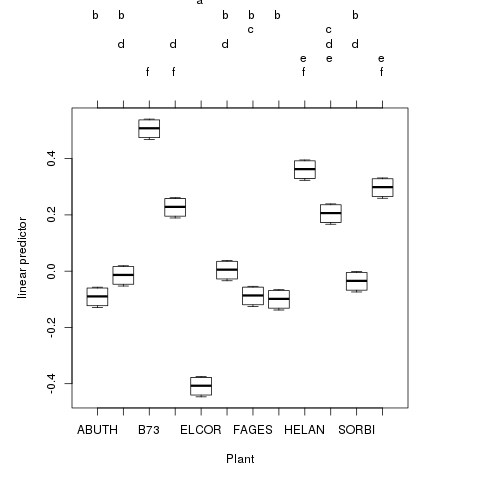

In [68]:
%%R
#just Nneg
data = filter(Master, Type != "Maize" & Treatment == "Nneg" | Plant == "B73" & Treatment == "Nneg")
m = lmer(A_Resid_logCN ~ Plant + (1|Rep), 
          data = data, na.rm = TRUE)
         #summary(m) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

m1.lsm = lsmeans(m)
m1.glht = glht(m, linfct = mcp(Plant = "Tukey"))
#summary(m1.glht)
m1.cld = cld(m1.glht, level = 0.05)
old.par <- par(mai=c(1,1,1.5,1), no.readonly = TRUE)
plot(m1.cld)

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
      Sum Sq Mean Sq NumDF DenDF F.value    Pr(>F)    
Plant 1.7553 0.15957    11    33  7.6714 2.309e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


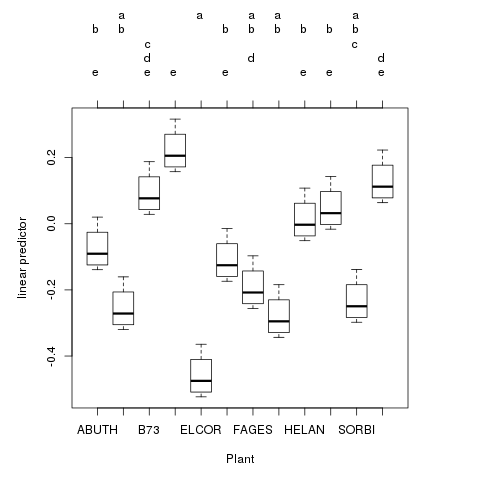

In [70]:
%%R
#just Npos
data = filter(Master, Type != "Maize" & Treatment == "Npos" | Plant == "B73" & Treatment == "Npos")
m = lmer(A_Resid_logCN ~ Plant + (1|Rep), 
          data = data, na.rm = TRUE)
         #summary(m) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

m1.lsm = lsmeans(m)
m1.glht = glht(m, linfct = mcp(Plant = "Tukey"))
#summary(m1.glht)
m1.cld = cld(m1.glht, level = 0.05)
old.par <- par(mai=c(1,1,1.5,1), no.readonly = TRUE)
plot(m1.cld)

## Maize - Biomass residuals

In [43]:
%%R
#Full anova
data = filter(Master, Type == "Maize")
m = lmer(M_Resid_logB ~ Plant + Treatment + Plant:Treatment +
          (1|Rep) + (1|Rep:Plant), 
          data = data, na.rm = TRUE)
         #summary(m1) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                 Sum Sq  Mean Sq NumDF DenDF F.value   Pr(>F)   
Plant           1.29948 0.129948    10    30  3.9905 0.001543 **
Treatment       0.17267 0.172671     1    33  5.3025 0.027739 * 
Plant:Treatment 0.27791 0.027791    10    33  0.8534 0.583234   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
      Sum Sq Mean Sq NumDF DenDF F.value   Pr(>F)   
Plant 1.8694 0.18694    10    30  3.9642 0.001616 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


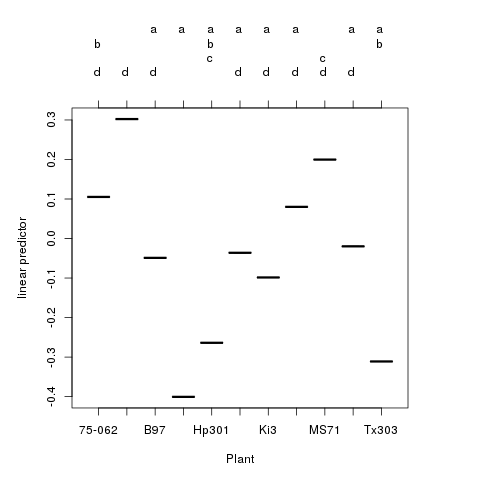

In [44]:
%%R
#Just Nneg
data = filter(Master, Type == "Maize" & Treatment == "Nneg")
m = lmer(M_Resid_logB ~ Plant  +
          (1|Rep), 
          data = data, na.rm = TRUE)
         #summary(m1) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

m1.lsm = lsmeans(m)
m1.glht = glht(m, linfct = mcp(Plant = "Tukey"))
#summary(m1.glht)
m1.cld = cld(m1.glht, level = 0.05)
old.par <- par(mai=c(1,1,1.5,1), no.readonly = TRUE)
plot(m1.cld)

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
       Sum Sq  Mean Sq NumDF DenDF F.value Pr(>F)  
Plant 0.87644 0.087644    10    30  1.9149 0.0826 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


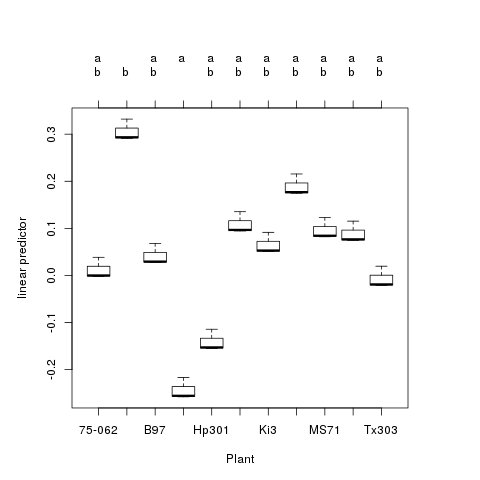

In [45]:
%%R
#Just Npos
data = filter(Master, Type == "Maize" & Treatment == "Npos")
m = lmer(M_Resid_logB ~ Plant  +
          (1|Rep), 
          data = data, na.rm = TRUE)
         #summary(m1) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

m1.lsm = lsmeans(m)
m1.glht = glht(m, linfct = mcp(Plant = "Tukey"))
#summary(m1.glht)
m1.cld = cld(m1.glht, level = 0.05)
old.par <- par(mai=c(1,1,1.5,1), no.readonly = TRUE)
plot(m1.cld)

## Maize- N uptake residuals

In [33]:
%%R
#Full anova
data = filter(Master, Type == "Maize")
m = lmer(M_Resid_logN ~ Plant + Treatment + Plant:Treatment +
          (1|Rep) + (1|Rep:Plant), 
          data = data, na.rm = TRUE)
         #summary(m1) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                 Sum Sq Mean Sq NumDF DenDF F.value    Pr(>F)    
Plant           0.87717 0.08772    10    30  1.3771    0.2379    
Treatment       1.54284 1.54284     1    33 24.2215 2.324e-05 ***
Plant:Treatment 0.41601 0.04160    10    33  0.6531    0.7579    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
       Sum Sq  Mean Sq NumDF DenDF F.value Pr(>F)
Plant 0.93352 0.093352    10    30 0.90773 0.5385


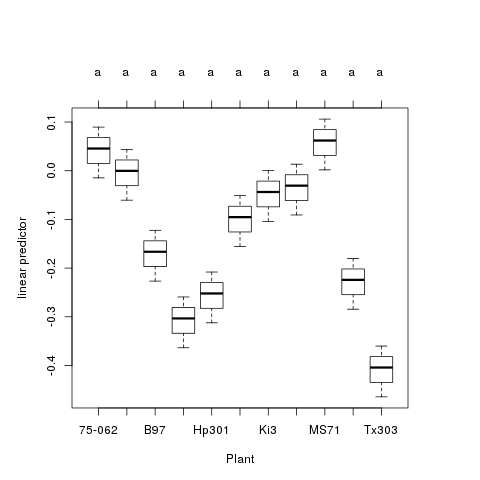

In [41]:
%%R
#Just Nneg
data = filter(Master, Type == "Maize" & Treatment == "Nneg")
m = lmer(M_Resid_logN ~ Plant  +
          (1|Rep), 
          data = data, na.rm = TRUE)
         #summary(m1) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

m1.lsm = lsmeans(m)
m1.glht = glht(m, linfct = mcp(Plant = "Tukey"))
#summary(m1.glht)
m1.cld = cld(m1.glht, level = 0.05)
old.par <- par(mai=c(1,1,1.5,1), no.readonly = TRUE)
plot(m1.cld)

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
       Sum Sq  Mean Sq NumDF DenDF F.value Pr(>F)
Plant 0.94489 0.094489    10    30  1.5282 0.1779


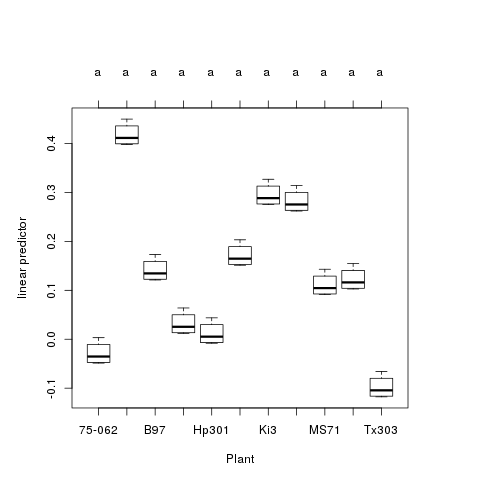

In [42]:
%%R
#Just Npos
data = filter(Master, Type == "Maize" & Treatment == "Npos")
m = lmer(M_Resid_logN ~ Plant  +
          (1|Rep), 
          data = data, na.rm = TRUE)
         #summary(m1) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

m1.lsm = lsmeans(m)
m1.glht = glht(m, linfct = mcp(Plant = "Tukey"))
#summary(m1.glht)
m1.cld = cld(m1.glht, level = 0.05)
old.par <- par(mai=c(1,1,1.5,1), no.readonly = TRUE)
plot(m1.cld)

## Maize - C:N residual

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                 Sum Sq Mean Sq NumDF DenDF F.value    Pr(>F)    
Plant           1.39593 0.13959    10    30  10.669 2.040e-07 ***
Treatment       0.65839 0.65839     1    33  50.321 4.019e-08 ***
Plant:Treatment 0.23962 0.02396    10    33   1.831   0.09346 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


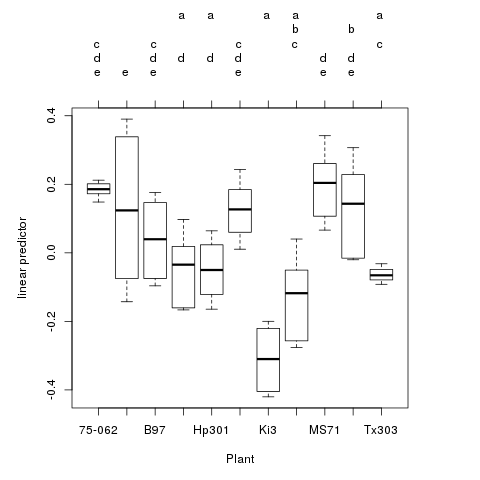

In [65]:
%%R
#All plots
data = filter(Master, Type == "Maize" )
m = lmer(M_Resid_logCN ~ Plant + Treatment + Plant:Treatment +
          (1|Rep) + (1|Rep:Plant),
          data = data, na.rm = TRUE)
         #summary(m1) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

m1.lsm = lsmeans(m)
m1.glht = glht(m, linfct = mcp(Plant = "Tukey"))
#summary(m1.glht)
m1.cld = cld(m1.glht, level = 0.05)
old.par <- par(mai=c(1,1,1.5,1), no.readonly = TRUE)
plot(m1.cld)

# Check Maize modeled residuals vs annualls calculated residuals
* determine if A_resids can be used for all plants

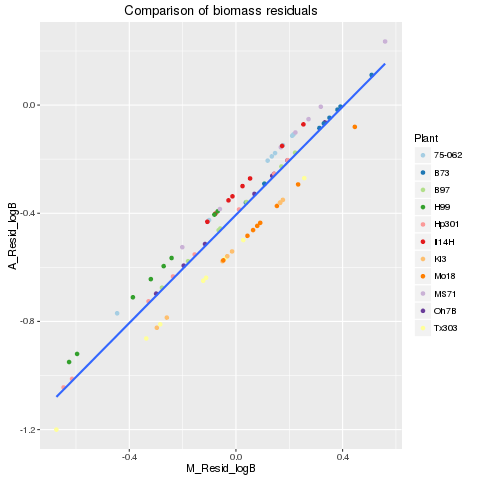

In [72]:
%%R
data = filter(Master, Type == "Maize")

p = ggplot(data)
p = p + geom_point(aes(M_Resid_logB, A_Resid_logB, fill = Plant, colour = Plant), pch = 21 )
p = p + stat_smooth(method = "lm", aes(y= A_Resid_logB, x=M_Resid_logB), se = FALSE)
p = p + scale_fill_brewer(palette="Paired")
p = p + scale_colour_brewer(palette="Paired")
p = p + ggtitle("Comparison of biomass residuals")
p

* Using annual model introduces systemic bias based on sampling date, best to use maize calculated residuals